<h2 style='color:purple' align='center'>Air Quality Prediction</h2>

### 1. Importing libraries and their associated methods


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

### 2. Loading the Dataset

In [104]:
train_df = pd.read_csv("./Air Quality Train Data/Train.csv")
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [105]:
# Finding out the total number of data points and features
train_df.shape

(1600, 6)

In [106]:
# Here we can see that the columns name are not given.

<br>

### 3. Cleaning and Normalising the Data

In [107]:
# Converting Data Frame to Numpy array
trainData = np.array(train_df)

In [108]:
X = trainData[:, :5]
Y = trainData[:, -1]

In [109]:
X

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [110]:
Y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [111]:
X = (X - np.mean(X)) / np.std(X)

In [112]:
X

array([[ 0.31139642, -0.92093003, -0.3992678 ,  0.42418404,  0.5423883 ],
       [-0.81200658, -0.16864243, -0.75264729, -1.02857829,  0.61433283],
       [ 0.25471295,  0.15168305, -0.12736142,  0.71564009, -0.16678861],
       ...,
       [ 1.05810433, -0.87478823,  1.74062205, -1.84139222,  0.45969493],
       [-1.24275748,  0.01453923,  1.8672047 , -1.05496863,  0.75192314],
       [-1.85426585, -0.8252779 , -1.42486653,  0.50553954,  1.47126077]])

<br>

### 4. Data Visulisation

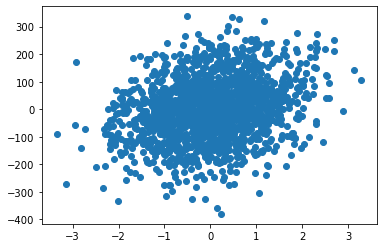

In [113]:
plt.scatter(X[:, 0], Y)
plt.show()

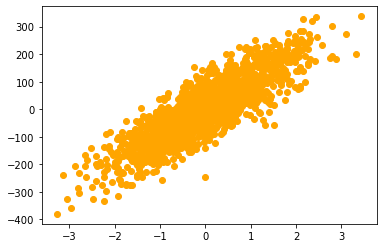

In [114]:
plt.scatter(X[:, 1], Y, color="orange")
plt.show()

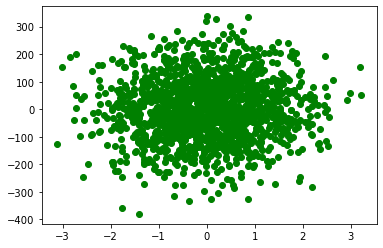

In [115]:
plt.scatter(X[:, 2], Y ,color="Green")
plt.show()

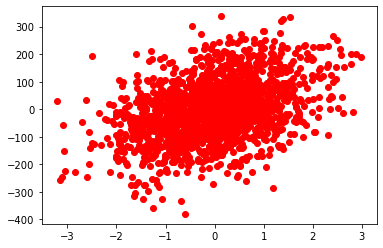

In [116]:
plt.scatter(X[:, 3], Y, color="Red")
plt.show()

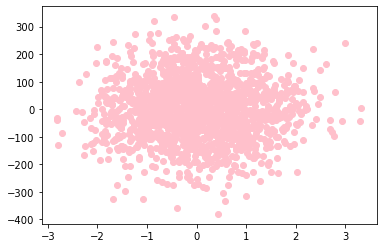

In [117]:
plt.scatter(X[:, 4], Y, color="pink")
plt.show()

<br>

### 5. Inserting ones column for theta0

In [118]:
# Inserting ones column for theta0

ones = np.ones((X.shape[0], 1))

In [119]:
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [120]:
X = np.hstack((X, ones))

In [121]:
X

array([[ 0.31139642, -0.92093003, -0.3992678 ,  0.42418404,  0.5423883 ,
         1.        ],
       [-0.81200658, -0.16864243, -0.75264729, -1.02857829,  0.61433283,
         1.        ],
       [ 0.25471295,  0.15168305, -0.12736142,  0.71564009, -0.16678861,
         1.        ],
       ...,
       [ 1.05810433, -0.87478823,  1.74062205, -1.84139222,  0.45969493,
         1.        ],
       [-1.24275748,  0.01453923,  1.8672047 , -1.05496863,  0.75192314,
         1.        ],
       [-1.85426585, -0.8252779 , -1.42486653,  0.50553954,  1.47126077,
         1.        ]])

<br>

### 6. Dividing the Data into Training and Testing Data

In [122]:
divideRatio = 0.8
m = X.shape[0]

print(m)

1600


In [123]:
Y = Y.reshape((1600, 1))

In [124]:
X_train = X[:int(m*divideRatio), :]
Y_train = Y[:int(m*divideRatio)]
X_test =  X[int(m*divideRatio) :, :]
Y_test =  Y[int(m*divideRatio) :]

<br>

### 7. Applying Closed Form Technique in Linear Regression

In [125]:
# Closed Form Algorithm 

def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    
    Y = np.mat(Y)
    X = np.mat(X)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [126]:
theta = getThetaClosedForm(X_train, Y_train)

In [127]:
theta

matrix([[29.51309814],
        [92.79609254],
        [ 8.36320621],
        [45.17902797],
        [ 2.65226554],
        [ 1.39672714]])

In [128]:
Y_pred = predict(X_test, theta)

In [129]:
Y_pred.shape

(320, 1)

In [130]:
Y_test.shape

(320, 1)

In [131]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [132]:
r2_score(np.ravel(Y_test), np.ravel(Y_pred))

96.3902104917069